<a href="https://colab.research.google.com/github/Udithkanchana/Instagram-Data-Analysis/blob/main/Instagram_Reach_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/SLIIT/Data_Science/Data Analyst Projects

/content/gdrive/MyDrive/SLIIT/Data_Science/Data Analyst Projects


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [4]:
#Lets import the dataset now...
data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [5]:
data.isnull().sum()

#data = data.dropna()  if null values are available, using this we can remove them

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


Let us see the distribution of impressions recieved from home (means our ownfollowers) Remember probability distribution. Just like that you can see that our posts are reached to around 2000 people more frequently. Rarely reached the range of 14000 followers.   

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


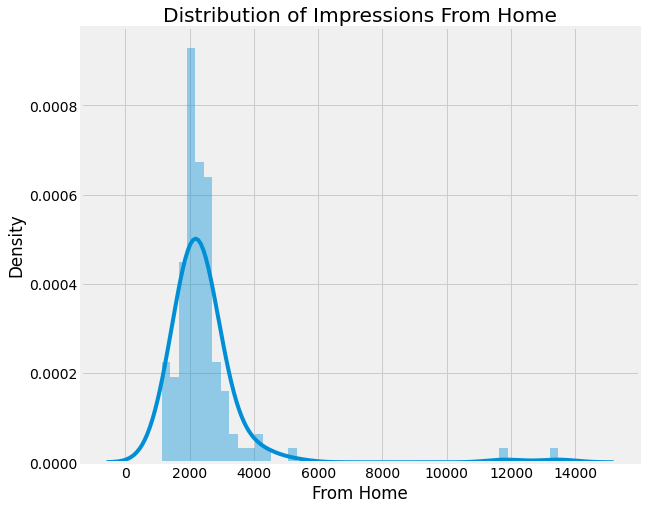

In [7]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

So the implication is that from home, we cannot reach all the followers. It is obvous anyway.

Now lets see how much reach we have gained from hashtags.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


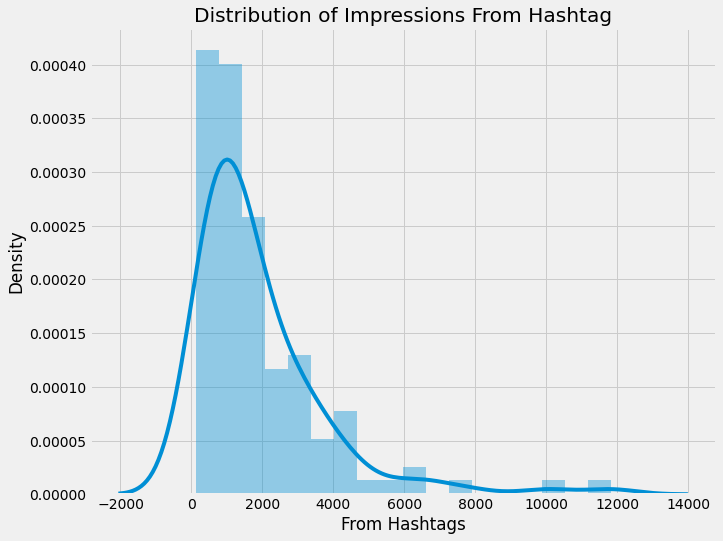

In [8]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hashtag")
sns.distplot(data['From Hashtags'])
plt.show()

It appears that from hashtags we get lesser reach than from home. Next lets see the reach from Explore (which means from the recommendation section)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


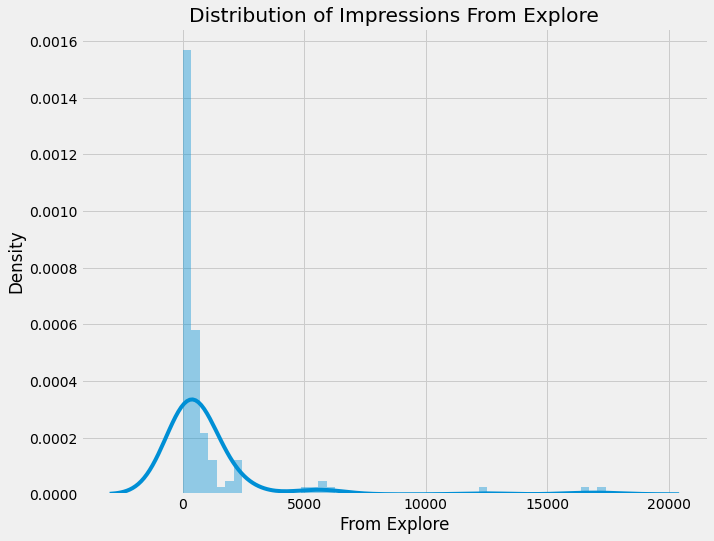

In [9]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

Very low reach achieved from the Explore.

Now let us see how much reaches (impressions) it has gained from Home,Explor,hashtag, and others

In [10]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [11]:
label = ["Home", "Hashtag", "Explore", "Other"]
counts = data[["From Home", "From Hashtags", "From Explore", "From Other"]].sum()
colors = ['light red','light green', "gray", "light blue"]

pie = go.Figure(data=[go.Pie(labels=label, values=counts)])
pie.update_layout(title_text='Impressions from different sources')
pie.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
pie.show()


Now let us create a WordCloud using caption data.

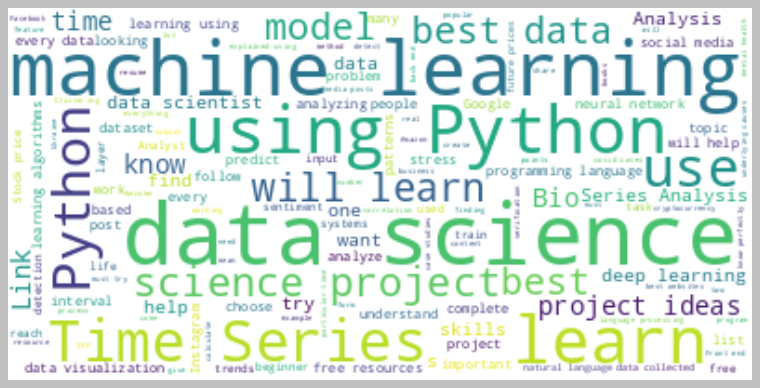

In [12]:
text = " ".join(i for i in data.Caption) #create a string using all the words in caption column
stopwords = set(STOPWORDS) #stop words set
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) #create the wordcloud
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear') #display the wordcloud
plt.axis("off")
plt.show()

Create a wordcloud for hashtags.

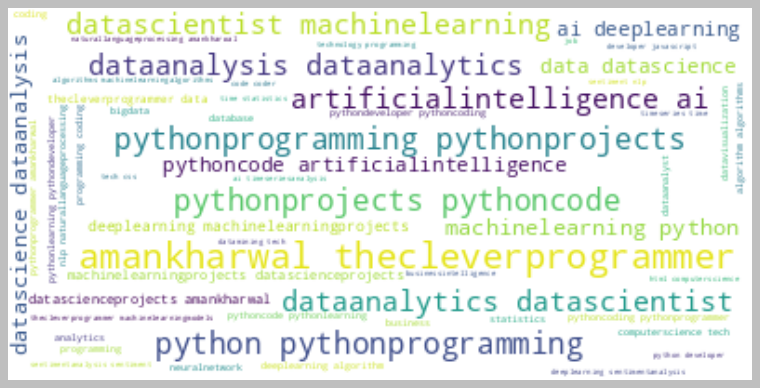

In [13]:
text = " ".join(i for i in data.Hashtags) #create a string using all the words in caption column
stopwords = set(STOPWORDS) #stop words set
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) #create the wordcloud
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear') #display the wordcloud
plt.axis("off")
plt.show()

In order to understand the behaviour of Instagram algorithms, let us create some relationships. First the relationship between the impression(reach) & likes. Let's create a scatter plot.

In [14]:
plot = px.scatter(data_frame = data, x="Likes", y="Impressions", trendline="ols", title="Relationship between Likes & Impressions")
plot.show()

It appears to be a linear relationship, so more likes means that it is most likely to cause high impression. Like wise we can create many relationships between impression and share,comments, etc.

Or dirctly we can look at the correlation between impression and other variables to get an undertanding about the relationships.

In [15]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


You can see that the Explore, Follows,Likes, From Home have a strong correlation with Impression. So they have a huge effect on impession.

Conversion rate is something very important. This refers to the number of page visits result in being followers. 

In [20]:
conversion = (data['Follows'].sum()/data['Profile Visits'].sum()) *100
print(conversion)

41.00265604249668


So 41% of those who visit the page end up being followers. That's not a bad conversion rate.

Now lets see the relationship between profile visits & follows. It has to be a linear one obviously. 

In [22]:
plot = px.scatter(data_frame = data, x="Profile Visits", y="Follows",size="Follows", trendline="ols", title="Relationship between Profile visits & Follows")
plot.show()

Now we can predict future impression of this Instagram account using Machine Learning. Let us first split dataset into training & testing datasets. 

In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

Here, the passive regression model, which is a good online learning algorithm (not need to train the entire data set again and again) ,is used to make predictions.

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8723815847750483

Lets make predictions using the model

In [ ]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12271.35421738])